### 1. Sigmoid : 0~1까지만 출력

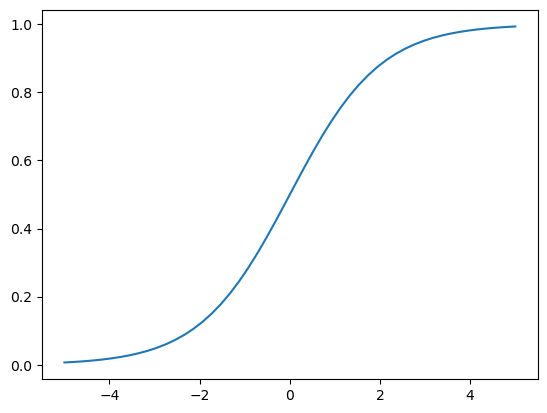

In [4]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid_function(x):
    return 1/(1+np.exp(-x))
    
x = np.linspace(-5, 5)
y = sigmoid_function(x)

plt.plot(x, y)
plt.show()

● 시그모이드 함수 y의 도함수는

y= (1 −  )
손쉽게 미분가능하여 신경망분야에서 많이 사용

### 2. tanh

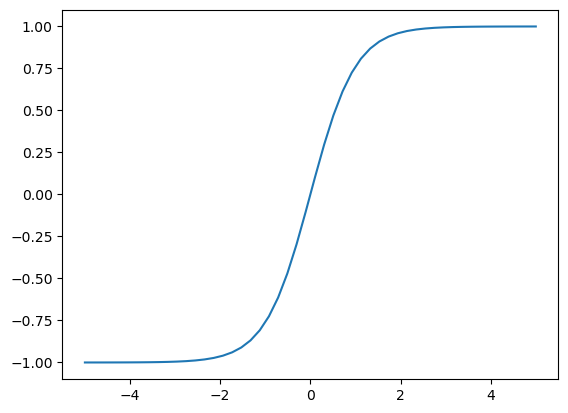

In [6]:
def tanh_function(x):
    return np.tanh(x)
x = np.linspace(-5, 5)
y = tanh_function(x)
plt.plot(x, y)
plt.show()

### 3. ReLU(Rectified Linear Unit) : 음수 = 0 / 양수 = 출력

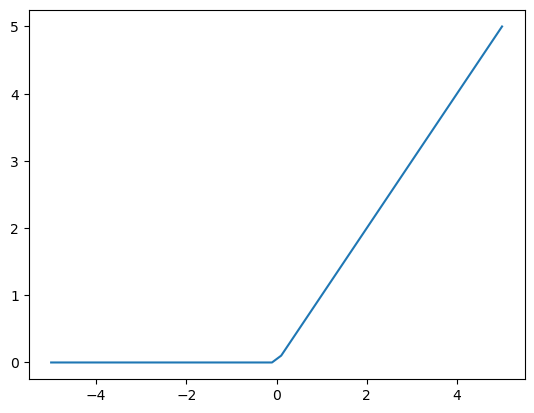

In [10]:
def relu_function(x):
    return np.where(x <= 0, 0, x)
x = np.linspace(-5, 5)
y = relu_function(x)
plt.plot(x, y)
plt.show()

### 4. Leaky ReLU
- x가 음수인 영역에서 아주 작은 기울기를 생성
- 출력이 0이 되어 더 이상 학습이 진행되지 않는 뉴런이 발생하는 dying ReLU 현상을 피하기 위해 사용

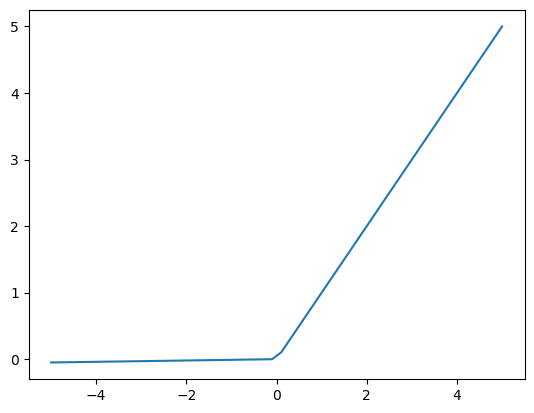

In [9]:
def leaky_relu_function(x):
    return np.where(x <= 0, 0.01*x, x)
x = np.linspace(-5, 5)
y = leaky_relu_function(x)
plt.plot(x, y)
plt.show()

### 5. Softmax
- 입력받은 값을 출력으로0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상1이 되는 특성을 가진 함수

In [11]:
def softmax_function(x):
    return np.exp(x)/np.sum(np.exp(x)) # 소프트맥스함수
y = softmax_function(np.array([1,2,3]))
print(y)

[0.09003057 0.24472847 0.66524096]


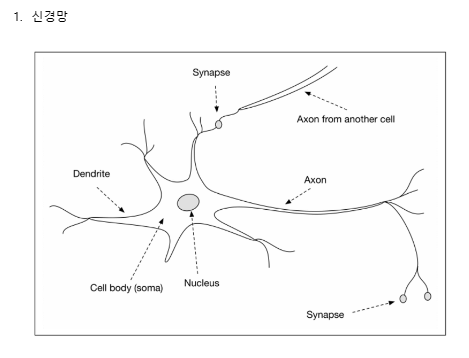

- Dendrite : 정보전달(정보가 이것을 통해 들어온다)
- Axon : 정보전달을 위한 장치
- Synapse : 떨어져있는데 정보 전달을 할때 신경물질

### 2. 뉴런 모델

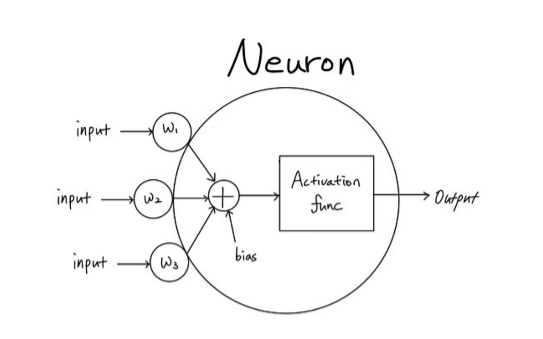

- input에 w(가중치)를 곱해준고 모두 sum + bias
- Activation func(활성화 함수): 통해서 output할 것이냐 말 것이냐


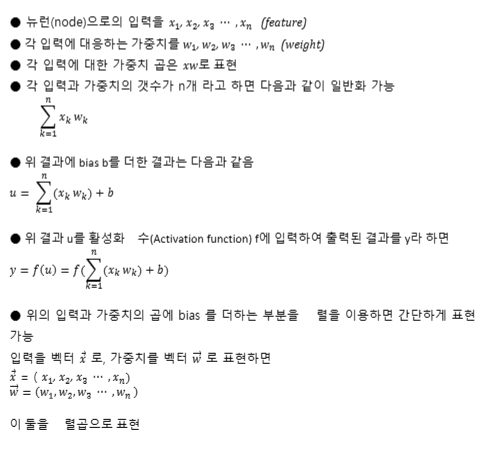

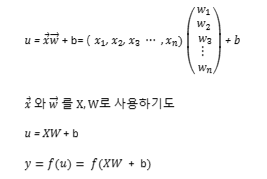

### 3. 단일 신경망 구축


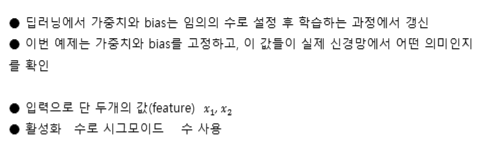

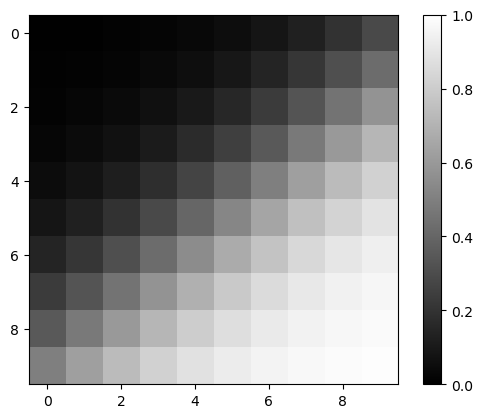

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# x1, x2값
X1 = np.arange(-1.0, 1.0, 0.2) # 원소 수는 10개
X2 = np.arange(-1.0, 1.0, 0.2)

# 출력값을 저장할 10x10 그리드
Z = np.zeros((10, 10))

# x1, x2 값의 입력 가중치
w_x1 = 2.5
w_x2 = 3.0

# 편
bias = 0.1

# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
    
        # 입력과 가중치 곱의 합 + 편향
        u = X1[i]*w_x1 + X2[j]*w_x2 + bias 

        # 그리드맵에 출력 값 저장
        y = 1/(1+np.exp(-u)) # 시그모이드 함수
        
        Z[j][i] = y
        
# 그리드맵 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()  
plt.show()


- numpy의 ndarray를 이용한 행렬 연산

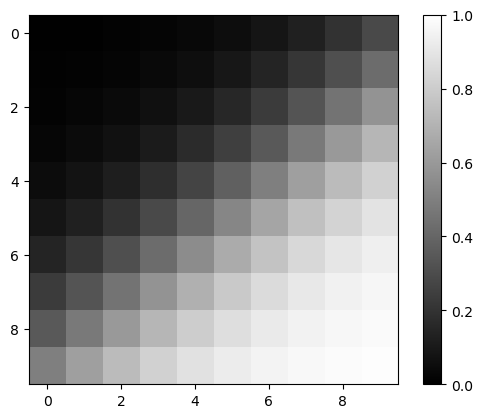

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# x1, x2 값
X1 = np.arange(-1.0, 1.0, 0.2)  # 원소 수는 10개
X2 = np.arange(-1.0, 1.0, 0.2)

# 출력값을 저장할 10x10 그리드
Z = np.zeros((10,10))

# x, y 값의 입력 가중치
W = np.array([2.5,3.0])

# 편향
bias = np.array([0.1])

# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
    
        # 입력과 가중치 곱의 합 + 편향
        list1 = [X1[i], X2[j]]
        X = np.array(list1)
        u = np.dot(X, W.T) + bias # W.T 전체행렬 (세로 행렬로 바꿘줌)

        # 그리드맵에 출력 값 저장
        y = 1/(1+np.exp(-u)) # 시그모이드 함수
        Z[j][i] = y
        
# 그리드맵 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()  

### 4. 다중 신경망

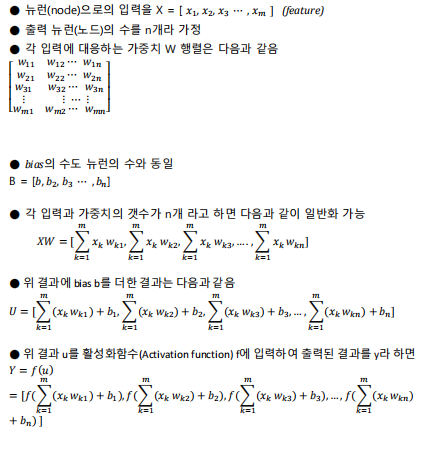

- 위 결과를 그림으로 표현
    - Fully Connected Layer(fc1, fc2,,,) or Network

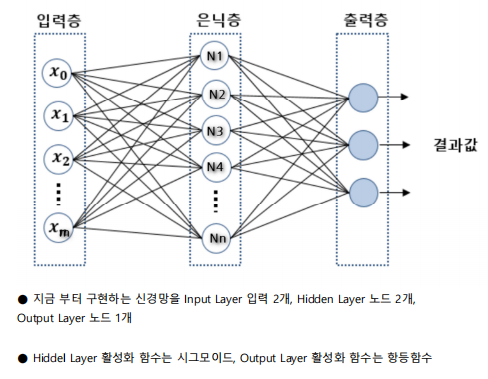

- m by n matrix
- bias의 갯수 = n개

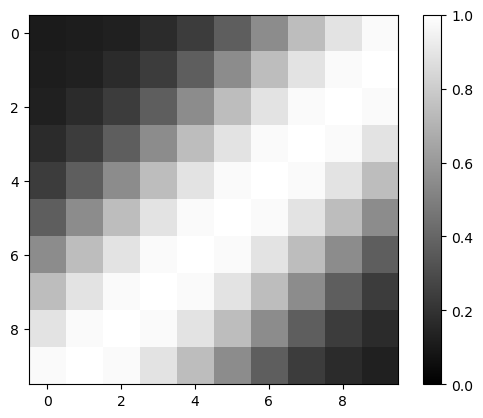

In [22]:
import numpy as np
import matplotlib.pyplot as plt
# x, y 값
X = np.arange(-1.0, 1.0, 0.2) # 원소는 10개
Y = np.arange(-1.0, 1.0, 0.2)

# 출력을 저장하는 10X10 그리드
Z = np.zeros((10,10))

# 가중치
w_im = np.array([[4.0,4.0],
        [4.0,4.0]]) # 은닉층 2x2 행렬
w_mo = np.array([[1.0],
        [-1.0]]) # 출력층 2x1 행렬

# 편향
b_im = np.array([3.0,-3.0]) # 은닉층
b_mo = np.array([0.1]) # 출력층

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u)) # 시그모이드 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u # 항등함수

# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):
        
        # 순전파
        inp = np.array([X[i], Y[j]]) # 입력층
        mid = middle_layer(inp, w_im, b_im) # 은닉층
        out = output_layer(mid, w_mo, b_mo) # 출력층
        
        # 그리드맵에 신경망 출력 값 저장
        Z[j][i] = out[0]
        
# 그리드맵으로 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar() 
plt.show()

- 다른 수치 예제들은 03신경망.pdf 참고

### 5. 분류
- Input Layer 입력 2개, Hidden Layer 노드 2개, Output Layer 노드 2개 
- Output Layer 활성화 함수는 소프트맥스 사용

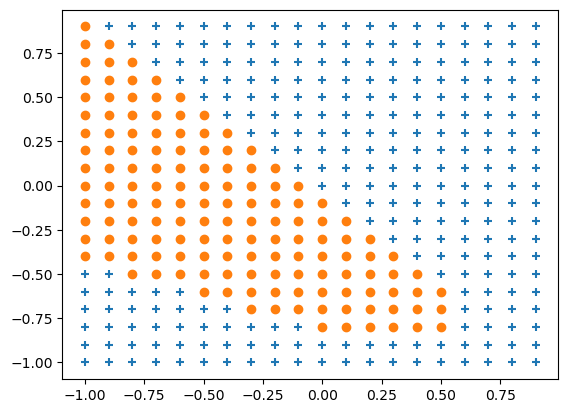

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# x, y 값
X = np.arange(-1.0, 1.0, 0.1) # 원소 수는 20개
Y = np.arange(-1.0, 1.0, 0.1)

# 가중치
w_im = np.array([[1.0,2.0],
[2.0,3.0]]) # 은닉층 2x2 행렬
w_mo = np.array([[-1.0,1.0],
[1.0,-1.0]]) # 출력층 2x2 행렬

# 편향
b_im = np.array([0.3,-0.3]) # 은닉층
b_mo = np.array([0.4,0.1]) # 출력층

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u)) # 시그모이드 함수

# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u)/np.sum(np.exp(u)) # 소프트맥스 함수
    # 결과 합이 1 

# 분류 결과를 저장하는 리스트
x_1 = []
y_1 = []
x_2 = []
y_2 = []

# 그리드맵의 각 그리드별 신경망 연산
for i in range(20):
    for j in range(20):
    
# 순전파 : 입력부터 출력까지 순서대로 진행
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)

# 확률의 크기를 비교해 분류함
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])

# 산포도 표시
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()

### 4. 역전파
- 1. 역전파(back-propagation)
- 역전파는 신경망을 학습시킬 때 이용하는 알고리즘
- 출력값과 정답의 오차를 네트워크에서 역전파시켜 네트워크의 가중치와 bias를 최적화시킴 : 모델을 만드는 작업


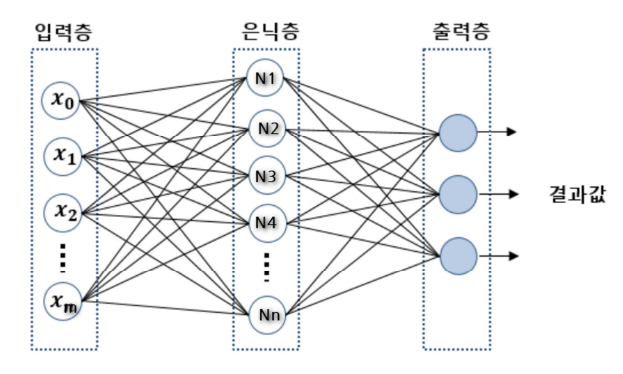

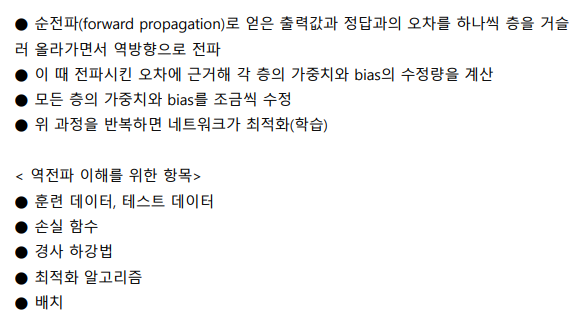

### 2. 훈련 데이터, 테스트 데이터
- 훈련 데이터가 많아야한다
- 훈련 데이터 - 신경망이 학습에 이용되는 데이터
- 테스트 데이터 - 학습 결과의 검증에 사용되는 데이터
- 각 데이터는 여러 개의 입력값(feature)과 정답으로 구성


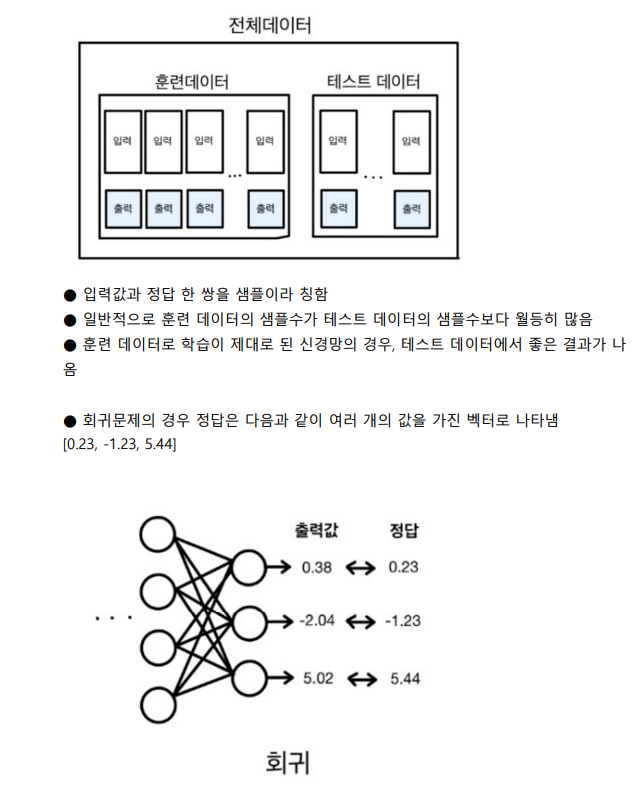

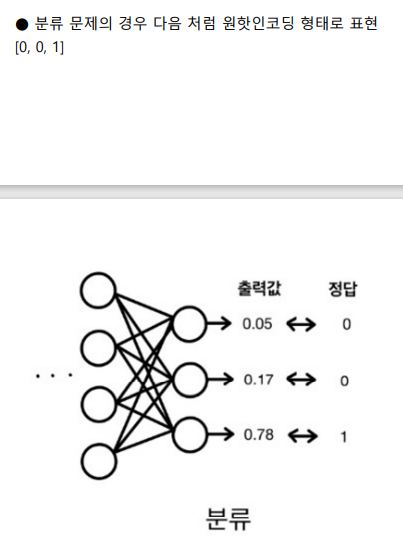

### 3. 손실함수(loss function)
- 출력값과 정답의 오차를 정의하는 함수

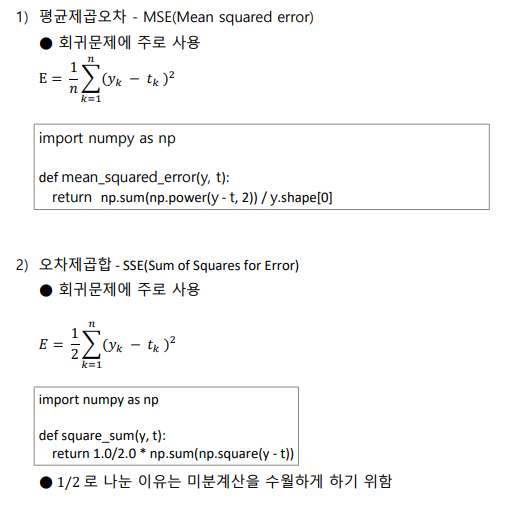

- n은 sample의 갯수

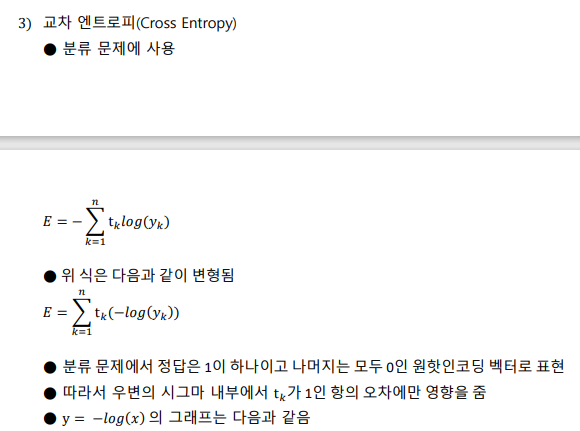

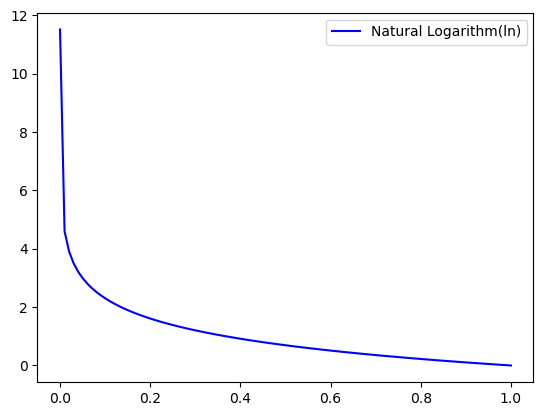

In [29]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(start=0.00001, stop=1.0, num=100)
plt.plot(x, -np.log(x), 'b-', label='Natural Logarithm(ln)')
plt.legend()
plt.show()


- x가 1일 때는 0이고, 0에 근접할수록 무한대로 커짐
- 즉, 정답에 가까울 수록 전체 오차 값은 작아지며, 반대로 정답에서 멀어질수록 한
없이 커짐
- 교차 엔트로피의 장점 중 하나는 출력값과 정답의 차이가 클 수록 학습 속도가 빨
라짐

In [32]:
import numpy as np
def cross_entropy(y, t): # 출력, 정답
    return - np.sum(t * np.log(y + 1e-7)) # 0.00000001

- log함수의 진수 부분이 0이 되면 무한 발산하여, 계산을 수행할 수 없기에 이를 방지하기 위해 1e-7 을 더했음

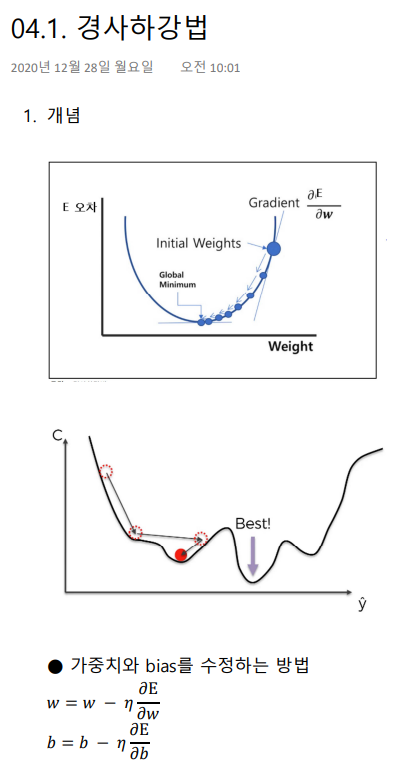

- 오차 함수를 특정 가중치로 편미분 > 접선의 기울기가 나온다(양수)
- 양수이면 자신의 값을 감소시켜야한다
- 보폭 : 얼마만큼씩 움직일 것인지
- 보폭을 크게하면 local minimum에서 나올 수 있다
- 어느 순간 0가 된다(global minimum) : 전역 최저점
- 에타 : learning rate >>> 학습률
- 기울기를 구하는 목적 : 직접 학습하게 해주기 위함

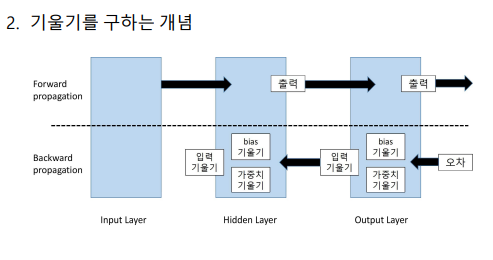

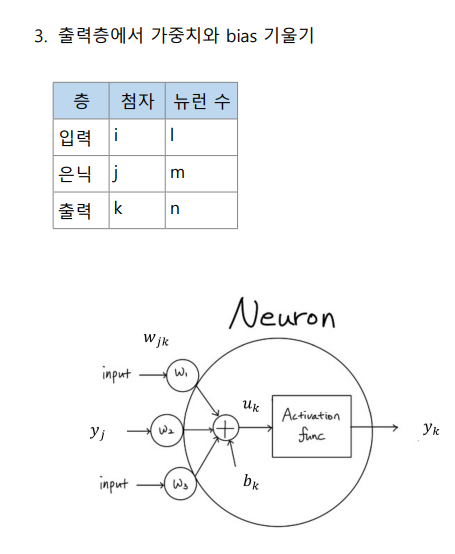

- Wjk : m by n 행렬에서 jk = mn
- aE는 전체오차

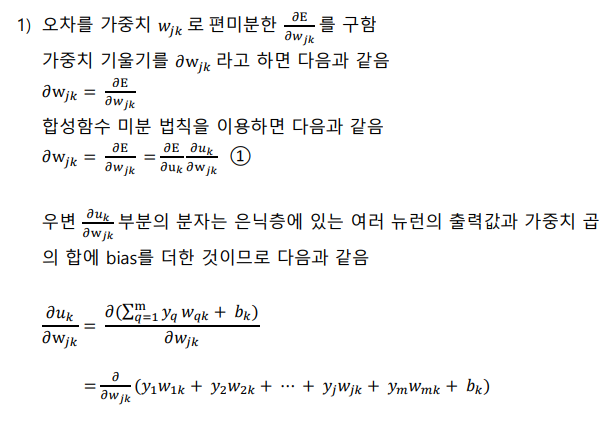

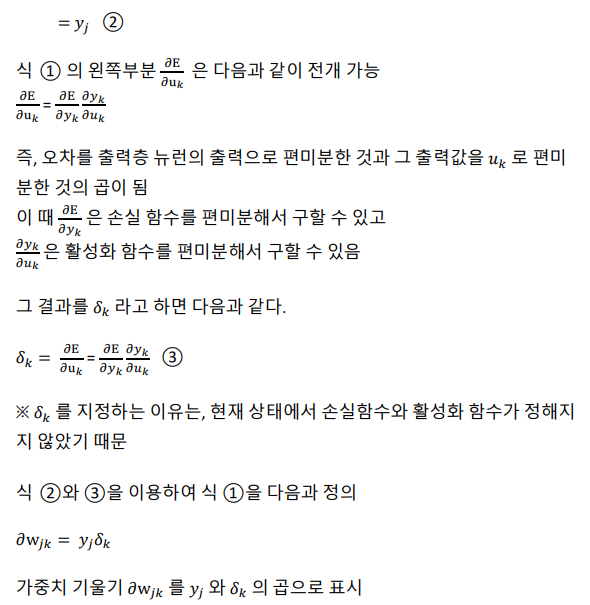

- 오차함수 = 손실함수
- k는 고정
- j행 k열
- 2번 : j 번째 입력만 남긴 것